In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.constants
import sys
sys.path.append('..')
from tl_metasurface.antenna import RectangularWaveguide, SIW
from tl_metasurface.element import Element

C = scipy.constants.c

f = 23E9
lam = C / f

element1 = Element(f=f)
rw = RectangularWaveguide(f=f,
                          element=element1, 
                          Lz=0.2, 
                          a=0.006,
                          b=0.000762,
                          delta_z=lam/4,
                          epsilon_r=3.48,
                          tan_delta=0.0037,
                          sigma_wall=5.8E7)
# rw.element.plot_alpha()
# rw.element.plot_S()

filepath_list = [r'C:\Users\Aaron\Documents\Kicad\Projects\TWI Demo Board - 24-06-10\Code\Array Design\Data\Element\Diode_12B_Element_Off.s3p',
                 r'C:\Users\Aaron\Documents\Kicad\Projects\TWI Demo Board - 24-06-10\Code\Array Design\Data\Element\Diode_12B_Element_On.s3p']
element2 = Element(filepath_list=filepath_list,
                   f=f)
siw = SIW(f=f,
          element=element2, 
          Lz=0.2, 
          a=0.006,
          b=0.000762,
          via_pitch=0.0008,
          via_diameter=0.0003,
          delta_z=lam/4,
          epsilon_r=3.48,
          tan_delta=0.0037,
          sigma_wall=5.8E7)
# siw.element.plot_alpha()
# siw.element.plot_S()

percent_on = 50
ts = np.zeros((siw.params['N']), dtype=int)
ts = np.random.choice([0, 1], size=siw.params['N'], p=[1-percent_on/100, percent_on/100])
siw.compute_fields(tuning_state=ts)
siw.compute_dipoles(tuning_state=ts)

print(rw)
print(siw)

PARAMETER                 VALUE                    
f                         23000000000.0            
Lz                        0.2                      
a                         0.006                    
b                         0.000762                 
delta_z                   0.0032586136739130435    
N                         61                       
m                         1                        
n                         0                        
epsilon_r                 3.48                     
tan_delta                 0.0037                   
sigma_wall                58000000.0               
omega                     144513262065.1305        
k                         899.2420839885194        
lambda                    0.006987201131992176     
beta_g                    731.0818338653872        
lambda_g                  0.008594366616879305     
k_c                       523.598775598299         
f_c                       13392135502.985004       
R_s         

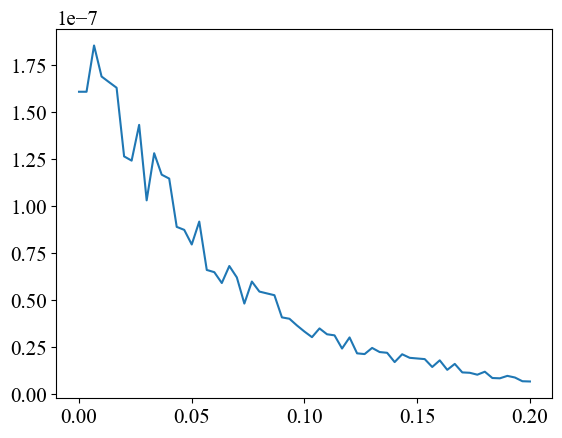

In [6]:
plt.figure()
# plt.plot(siw.z, np.abs(siw.H[:,0]))
plt.plot(siw.z, np.abs(siw.m_m[:,0]))
plt.show()